In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/JoosKorstanje/datasets/main/sales_data.csv')
data.head()

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
0,282.0,3.0,0,1,1
1,223.0,3.0,0,1,1
2,285.0,3.0,1,1,1
3,250.0,3.0,0,1,1
4,271.0,2.0,1,1,1


<AxesSubplot: xlabel='buy'>

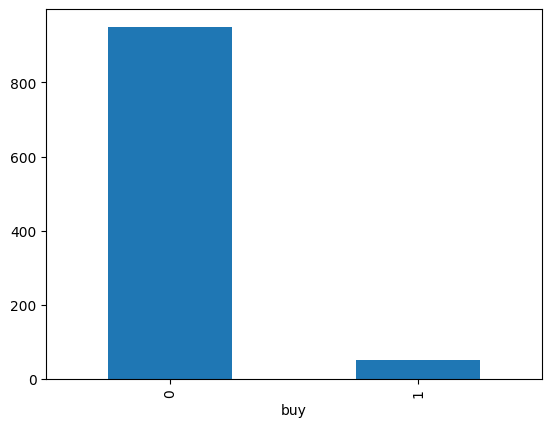

In [2]:
data.pivot_table(index='buy', aggfunc='size').plot(kind='bar')

In [3]:
# Create a stratified train/test split. 
# Test set will be 30% of the data.
# Class distribution will be equal for train test and original data

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, stratify=data.buy)

<AxesSubplot: title={'center': 'Verify that class distributuion in train is same as input data'}, xlabel='buy'>

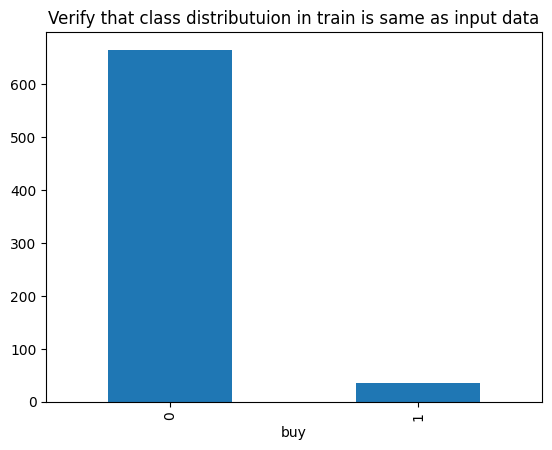

In [4]:
train.pivot_table(index='buy', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')

<AxesSubplot: title={'center': 'Verify that class distributuion in test is same as input data'}, xlabel='buy'>

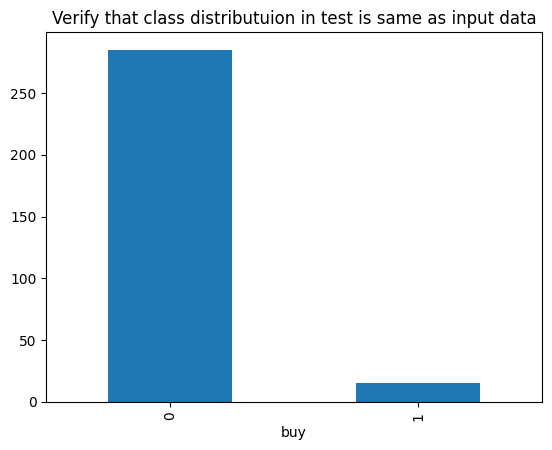

In [5]:
test.pivot_table(index='buy', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in test is same as input data')

In [6]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression with only default settings
my_log_reg = LogisticRegression()

# Fit the logistic regression on the independent variables of the train data with buy as dependent variable
my_log_reg.fit(train[['time_on_page',	'pages_viewed',	'interest_ski',	'interest_climb']], train['buy'])

# Make a prediction using our model on the test set
preds = my_log_reg.predict(test[['time_on_page',	'pages_viewed',	'interest_ski',	'interest_climb']])

In [7]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['buy'], preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  284 
False positives:  1 
False negatives:  7 
True Positives:  8


In [8]:
from sklearn.metrics import classification_report
print(classification_report(test['buy'], preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       0.89      0.53      0.67        15

    accuracy                           0.97       300
   macro avg       0.93      0.76      0.83       300
weighted avg       0.97      0.97      0.97       300



In [9]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train[['time_on_page',	'pages_viewed',	'interest_ski',	'interest_climb']], train['buy'])

<AxesSubplot: title={'center': 'Class distribution after appying SMOTE'}, xlabel='buy'>

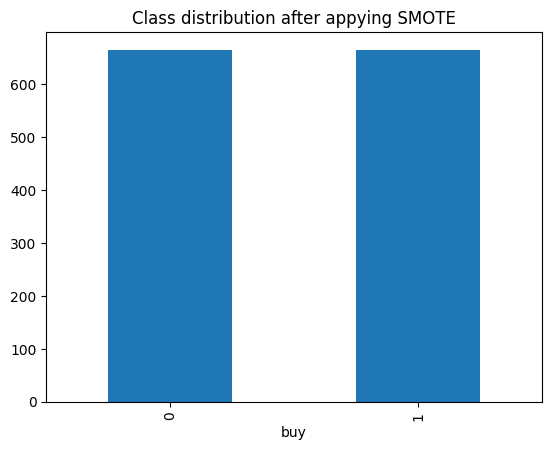

In [10]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='buy')

In [11]:
# Instantiate the new Logistic Regression
log_reg_2 = LogisticRegression()

# Fit the model with the data that has been resampled with SMOTE
log_reg_2.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
preds2 = log_reg_2.predict(test[['time_on_page', 'pages_viewed',	'interest_ski',	'interest_climb']])

In [12]:
tn, fp, fn, tp = confusion_matrix(test['buy'], preds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  258 
False positives:  27 
False negatives:  4 
True positives:  11


In [13]:
print(classification_report(test['buy'], preds2))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       285
           1       0.29      0.73      0.42        15

    accuracy                           0.90       300
   macro avg       0.64      0.82      0.68       300
weighted avg       0.95      0.90      0.92       300

